In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.7 MB/s eta 0:00:0000:0100:01


In [2]:
!pip install tensorflow

In [3]:
!pip install xgboost

In [4]:
!pip install lazypredict

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.style.use('bmh')

In [6]:
p_dep = pd.read_csv("/kaggle/input/finalytics/Post departure data.csv")
s_dat = pd.read_csv("/kaggle/input/finalytics/Schedule data.csv")
b_dat = pd.read_csv("/kaggle/input/finalytics/booking_data.csv")
r_dat = pd.read_csv("/kaggle/input/finalytics/revenue_data.csv")

In [7]:
b_dat.columns.tolist()

[' Origin',
 ' Destination',
 'Cabin',
 'Booking Class',
 ' Booking Class Fare USD ',
 'Airline',
 'Flight number',
 'Dep_Date',
 'Dep_time',
 'Class RDay Res Hold Total RDay: 365',
 'Class RDay Res Hold Total RDay: 364',
 'Class RDay Res Hold Total RDay: 363',
 'Class RDay Res Hold Total RDay: 362',
 'Class RDay Res Hold Total RDay: 361',
 'Class RDay Res Hold Total RDay: 360',
 'Class RDay Res Hold Total RDay: 359',
 'Class RDay Res Hold Total RDay: 358',
 'Class RDay Res Hold Total RDay: 357',
 'Class RDay Res Hold Total RDay: 356',
 'Class RDay Res Hold Total RDay: 355',
 'Class RDay Res Hold Total RDay: 354',
 'Class RDay Res Hold Total RDay: 353',
 'Class RDay Res Hold Total RDay: 352',
 'Class RDay Res Hold Total RDay: 351',
 'Class RDay Res Hold Total RDay: 350',
 'Class RDay Res Hold Total RDay: 349',
 'Class RDay Res Hold Total RDay: 348',
 'Class RDay Res Hold Total RDay: 347',
 'Class RDay Res Hold Total RDay: 346',
 'Class RDay Res Hold Total RDay: 345',
 'Class RDay Res H

In [8]:
b_dat['Flight number'].unique()

array([ 304,  306,  308,  314,  318,  322,  324,  326,  328,  332,  334,
        336,  338,  342,  344,  346,  348,  352,  354,  356,  358, 9538,
       1385, 1391, 1393, 1395, 1397, 1399, 1401, 1403, 1405, 1407,   92,
         94,   96, 2017,  552,  554,  556,  558,  560,  562,  570,  572,
        404,  412,  416,  418,  424,  428,  434,  438,  442,  444,   65])

In [10]:
b_dat['Unique_id'] = b_dat[' Origin'] + b_dat[' Destination']
b_dat

,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,Class RDay Res Hold Total RDay: 365,...,Class RDay Res Hold Total RDay: 8,Class RDay Res Hold Total RDay: 7,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0,Unique_id
0,BBB,DDD,Y,N,200.01,AA,304,4/10/2022,05:55,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10,BBBDDD
1,BBB,DDD,Y,H,463.65,AA,304,4/10/2022,05:55,NaN,...,0.0,0.0,1.0,6.0,7.0,7.0,7.0,7.0,7,BBBDDD
2,BBB,DDD,Y,G,149.83,AA,304,4/10/2022,05:55,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,BBBDDD
3,BBB,DDD,Y,T,127.29,AA,304,4/10/2022,05:55,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,BBBDDD
4,BBB,DDD,Y,S,90.92,AA,304,4/10/2022,05:55,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10,BBBDDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212796,YYY,CCC,Y,W,968.69,AA,65,21/09/2023,17:45,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8,YYYCCC
212797,YYY,CCC,J,D,1348.90,AA,65,21/09/2023,17:45,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,YYYCCC
212798,YYY,CCC,Y,Q,316.91,AA,65,21/09/2023,17:45,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,YYYCCC
212799,YYY,CCC,Y,K,693.79,AA,65,21/09/2023,17:45,NaN,...,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7,YYYCCC


In [11]:
b_dat['Unique_id'].unique()

array(['BBBDDD', 'AAABBB', 'CCCDDD', 'ZZZYYY', 'YYYAAA', 'YYYCCC'],
      dtype=object)

In [26]:
flight_data = b_dat[(b_dat['Flight number'] == 308)]

In [27]:
flight_data

,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,Class RDay Res Hold Total RDay: 365,...,Class RDay Res Hold Total RDay: 8,Class RDay Res Hold Total RDay: 7,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0,Unique_id
4624,BBB,DDD,J,C,563.65,AA,308,1/10/2022,06:55,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,BBBDDD
4625,BBB,DDD,J,J,836.38,AA,308,1/10/2022,06:55,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,BBBDDD
4626,BBB,DDD,J,D,386.69,AA,308,1/10/2022,06:55,NaN,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,BBBDDD
4627,BBB,DDD,Y,Q,145.47,AA,308,1/10/2022,06:55,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BBBDDD
4628,BBB,DDD,Y,K,372.74,AA,308,1/10/2022,06:55,NaN,...,42.0,42.0,42.0,42.0,42.0,44.0,44.0,44.0,44,BBBDDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504,BBB,DDD,Y,K,399.32,AA,308,21/09/2023,06:55,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BBBDDD
11505,BBB,DDD,Y,P,172.05,AA,308,21/09/2023,06:55,NaN,...,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,BBBDDD
11506,BBB,DDD,Y,W,562.95,AA,308,21/09/2023,06:55,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BBBDDD
11507,BBB,DDD,Y,I,111.89,AA,308,21/09/2023,06:55,NaN,...,28.0,28.0,28.0,28.0,28.0,28.0,28.0,26.0,25,BBBDDD


In [28]:
flight_data_X = flight_data[['Unique_id' , 'Cabin',
 'Booking Class',
 ' Booking Class Fare USD ' , 'Dep_Date' , 'Dep_time' , 'Class RDay Res Hold Total RDay: 0']]

In [29]:
flight_data_X

,Unique_id,Cabin,Booking Class,Booking Class Fare USD,Dep_Date,Dep_time,Class RDay Res Hold Total RDay: 0
4624,BBBDDD,J,C,563.65,1/10/2022,06:55,2
4625,BBBDDD,J,J,836.38,1/10/2022,06:55,2
4626,BBBDDD,J,D,386.69,1/10/2022,06:55,4
4627,BBBDDD,Y,Q,145.47,1/10/2022,06:55,0
4628,BBBDDD,Y,K,372.74,1/10/2022,06:55,44
...,...,...,...,...,...,...,...
11504,BBBDDD,Y,K,399.32,21/09/2023,06:55,0
11505,BBBDDD,Y,P,172.05,21/09/2023,06:55,5
11506,BBBDDD,Y,W,562.95,21/09/2023,06:55,0
11507,BBBDDD,Y,I,111.89,21/09/2023,06:55,25


In [30]:
import statsmodels.api as sm

In [32]:
pip install hierarchicalforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.8/452.8 kB 15.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
p_dep.head()

,Origin,Destination,Airline,Flight Number,Dep Date,Dep Time,Cabin,Cabin Capacity,Cabin Traffic Total
0,AAA,BBB,AA,1385,1/10/2022,6:10,J,8,7
1,AAA,BBB,AA,1385,1/10/2022,6:10,Y,168,158
2,AAA,BBB,AA,1391,1/10/2022,9:20,J,8,8
3,AAA,BBB,AA,1391,1/10/2022,9:20,Y,168,168
4,AAA,BBB,AA,1403,1/10/2022,17:45,J,8,8


In [34]:
p_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20608 entries, 0 to 20607
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Origin               20608 non-null  object
 1   Destination          20608 non-null  object
 2   Airline              20608 non-null  object
 3   Flight Number        20608 non-null  int64 
 4   Dep Date             20608 non-null  object
 5   Dep Time             20608 non-null  object
 6   Cabin                20608 non-null  object
 7   Cabin Capacity       20608 non-null  int64 
 8   Cabin Traffic Total  20608 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.4+ MB


In [35]:
p_dep['Cabin'].describe()

count     20608
unique        2
top           Y
freq      10692
Name: Cabin, dtype: object

In [36]:
p_dep['Percentage_filled'] = p_dep['Cabin Traffic Total'] / p_dep['Cabin Capacity']

In [37]:
p_dep['Origin'].unique()

array(['AAA', 'BBB', 'CCC', 'ZZZ', 'YYY'], dtype=object)

In [38]:
p_dep['Destination'].unique()

array(['BBB', 'DDD', 'YYY', 'AAA', 'CCC'], dtype=object)

In [39]:
p_dep['Unique_id'] = p_dep['Origin']+p_dep['Destination']

In [40]:
p_dep['filled'] = np.ones(p_dep['Unique_id'].size)

In [41]:
p_dep.groupby(['Flight Number']).count()['filled'].sort_values()

Flight Number
9538      2
338       2
438       2
551       2
2017      2
557       2
702       2
416       6
1397      6
1399      8
554      16
348      26
1401     36
304      38
444      48
354      48
358      84
344     157
1395    210
1407    226
94      248
332     266
1391    267
428     268
572     292
1403    312
570     314
96      342
558     346
556     361
424     374
1405    396
306     414
1393    415
336     462
356     473
552     541
324     550
334     564
326     569
404     580
442     582
346     606
92      622
418     626
65      644
434     662
352     668
314     670
328     671
308     679
1385    690
322     694
562     695
560     701
342     703
412     709
318     709
Name: filled, dtype: int64

In [42]:
p_dep

,Origin,Destination,Airline,Flight Number,Dep Date,Dep Time,Cabin,Cabin Capacity,Cabin Traffic Total,Percentage_filled,Unique_id,filled
0,AAA,BBB,AA,1385,1/10/2022,6:10,J,8,7,0.875000,AAABBB,1.0
1,AAA,BBB,AA,1385,1/10/2022,6:10,Y,168,158,0.940476,AAABBB,1.0
2,AAA,BBB,AA,1391,1/10/2022,9:20,J,8,8,1.000000,AAABBB,1.0
3,AAA,BBB,AA,1391,1/10/2022,9:20,Y,168,168,1.000000,AAABBB,1.0
4,AAA,BBB,AA,1403,1/10/2022,17:45,J,8,8,1.000000,AAABBB,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20603,YYY,CCC,AA,65,18/09/2023 00:00,17:45,Y,153,142,0.928105,YYYCCC,1.0
20604,YYY,CCC,AA,65,19/09/2023 00:00,17:45,J,8,8,1.000000,YYYCCC,1.0
20605,YYY,CCC,AA,65,19/09/2023 00:00,17:45,Y,153,136,0.888889,YYYCCC,1.0
20606,YYY,CCC,AA,65,20/09/2023 00:00,17:45,J,8,8,1.000000,YYYCCC,1.0


In [43]:
Data =p_dep[['Flight Number' , 'Dep Date' , 'Dep Time' , 'Cabin' , 'Cabin Capacity' , 'Cabin Traffic Total' , 'Percentage_filled']]

In [44]:
Data

,Flight Number,Dep Date,Dep Time,Cabin,Cabin Capacity,Cabin Traffic Total,Percentage_filled
0,1385,1/10/2022,6:10,J,8,7,0.875000
1,1385,1/10/2022,6:10,Y,168,158,0.940476
2,1391,1/10/2022,9:20,J,8,8,1.000000
3,1391,1/10/2022,9:20,Y,168,168,1.000000
4,1403,1/10/2022,17:45,J,8,8,1.000000
...,...,...,...,...,...,...,...
20603,65,18/09/2023 00:00,17:45,Y,153,142,0.928105
20604,65,19/09/2023 00:00,17:45,J,8,8,1.000000
20605,65,19/09/2023 00:00,17:45,Y,153,136,0.888889
20606,65,20/09/2023 00:00,17:45,J,8,8,1.000000


<Axes: xlabel='Percentage_filled', ylabel='Count'>

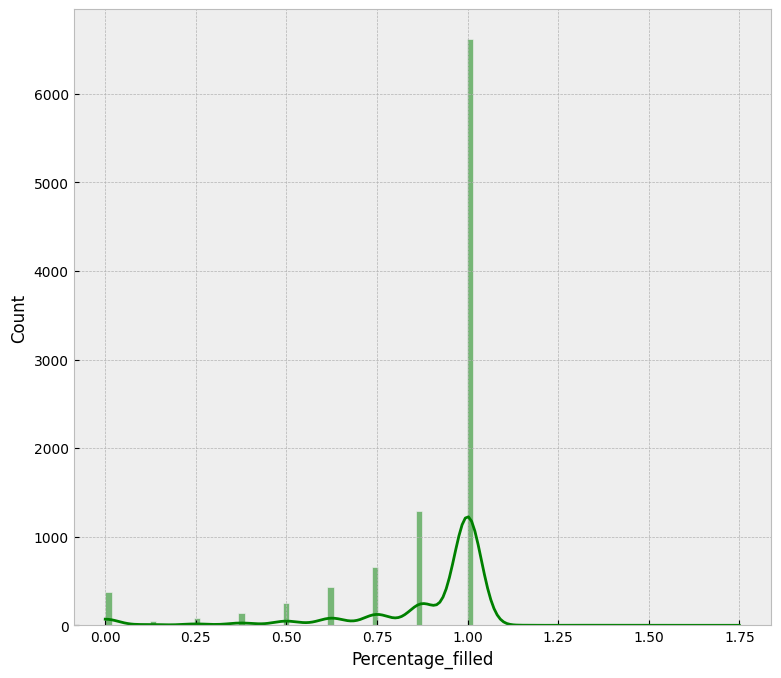

In [45]:
dfJ = Data[Data['Cabin'] == 'J']
dfJ['Percentage_filled'].describe()
plt.figure(figsize=(9, 8))
sns.histplot(dfJ['Percentage_filled'], color='g', bins=100 , kde = True)

<Axes: xlabel='Percentage_filled', ylabel='Count'>

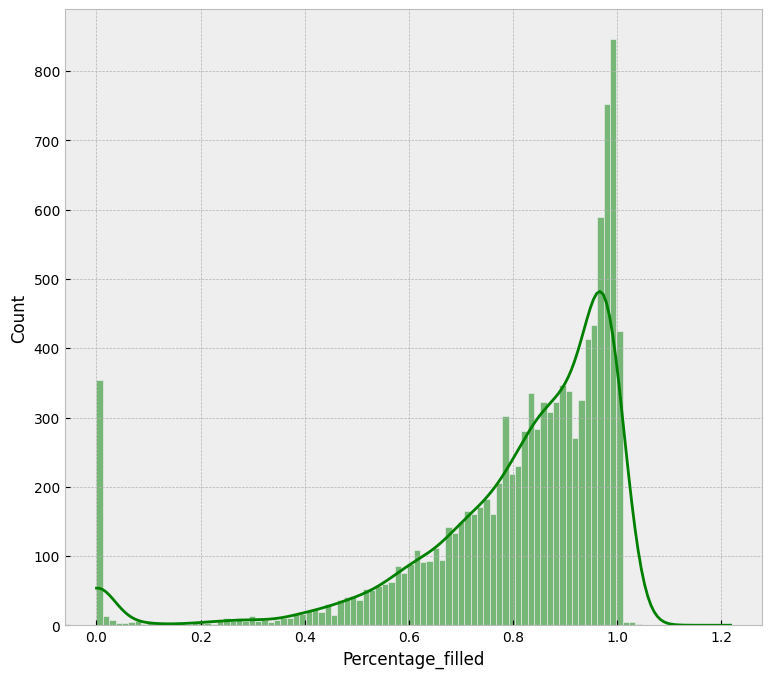

In [46]:
dfY = Data[Data['Cabin'] == 'Y']
dfY
dfY['Percentage_filled'].describe()
plt.figure(figsize=(9, 8))
sns.histplot(dfY['Percentage_filled'], color='g', bins=100 , kde = True)

count    3268.000000
mean       72.649633
std        69.133338
min         0.000000
25%         8.000000
50%         8.000000
75%       145.000000
max       170.000000
Name: Cabin Traffic Total, dtype: float64


<Axes: xlabel='Cabin Traffic Total', ylabel='Count'>

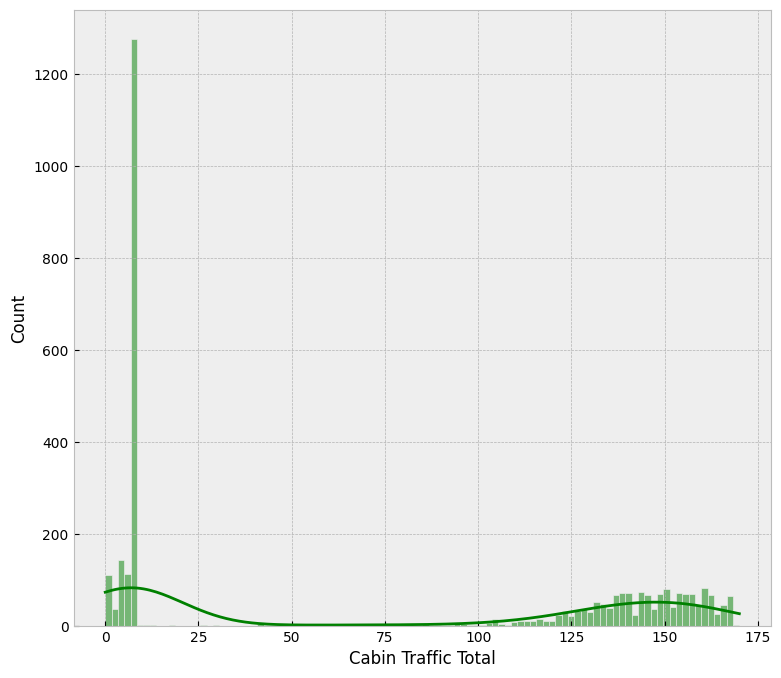

In [47]:
p_dep_ = p_dep.groupby(['Unique_id']).get_group('ZZZYYY')
print(p_dep_['Cabin Traffic Total'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(p_dep_['Cabin Traffic Total'], color='g', bins=100 , kde = True)

In [48]:
tsy = dfY[['Dep Time' , 'Dep Date' , 'Percentage_filled']]
tsy.reset_index(inplace = True)
tsy.drop(['index'] , axis = 1 , inplace = True)
tsy

/tmp/ipykernel_32/2985930296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsy.drop(['index'] , axis = 1 , inplace = True)


,Dep Time,Dep Date,Percentage_filled
0,6:10,1/10/2022,0.940476
1,9:20,1/10/2022,1.000000
2,17:45,1/10/2022,0.991667
3,9:20,2/10/2022,1.000000
4,17:45,2/10/2022,1.000000
...,...,...,...
10687,17:45,16/09/2023 00:00,0.000000
10688,17:45,17/09/2023 00:00,0.988024
10689,17:45,18/09/2023 00:00,0.928105
10690,17:45,19/09/2023 00:00,0.888889


In [49]:
dummy_data = pd.DataFrame(columns = ['Date' , 'Demand'])

In [50]:
# Define the start and end date for your time series
start_date = pd.Timestamp("10/01/2022 00:00:00")
end_date = pd.Timestamp("20/09/2023 23:59:59")

# Generate timestamps divided into 4 equal parts per day
timestamps = []
current_date = start_date
while current_date <= end_date:

    if current_date != start_date :
      current_date += pd.Timedelta(minutes = 1)
    current_date += pd.Timedelta(hours=7 , minutes = 59)  # First part of the day
    timestamps.append(current_date)
    current_date += pd.Timedelta(hours=8)  # Second part of the day
    timestamps.append(current_date)
    current_date += pd.Timedelta(hours=8)  # Third part of the day
    timestamps.append(current_date)


In [51]:
dummy_data['Date'] = timestamps

In [52]:
dummy_data

,Date,Demand
0,2022-10-01 07:59:00,NaN
1,2022-10-01 15:59:00,NaN
2,2022-10-01 23:59:00,NaN
3,2022-10-02 07:59:00,NaN
4,2022-10-02 15:59:00,NaN
...,...,...
1063,2023-09-20 15:59:00,NaN
1064,2023-09-20 23:59:00,NaN
1065,2023-09-21 07:59:00,NaN
1066,2023-09-21 15:59:00,NaN


In [53]:
from datetime import datetime , timedelta

In [54]:
dates = []
for i , j  in  enumerate(tsy['Percentage_filled']):
  date_string  = tsy['Dep Date'][i]
  if (len(date_string) <= 10):
    date = datetime.strptime(date_string , "%d/%m/%Y")
  else :
    date = datetime.strptime(date_string , "%d/%m/%Y %H:%M")

  date = datetime.strftime(date , "%d/%m/%Y")
  date_string  = date + " " + tsy['Dep Time'][i]
  date = datetime.strptime(date_string , "%d/%m/%Y %H:%M")
  date = datetime.strftime(date , "%Y-%m-%d %H:%M:%S")
  date = datetime.strptime(date , "%Y-%m-%d %H:%M:%S")
  dates.append(date)




In [55]:
tsy['Dtime'] = dates

/tmp/ipykernel_32/1733302644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsy['Dtime'] = dates


In [56]:
tsy

,Dep Time,Dep Date,Percentage_filled,Dtime
0,6:10,1/10/2022,0.940476,2022-10-01 06:10:00
1,9:20,1/10/2022,1.000000,2022-10-01 09:20:00
2,17:45,1/10/2022,0.991667,2022-10-01 17:45:00
3,9:20,2/10/2022,1.000000,2022-10-02 09:20:00
4,17:45,2/10/2022,1.000000,2022-10-02 17:45:00
...,...,...,...,...
10687,17:45,16/09/2023 00:00,0.000000,2023-09-16 17:45:00
10688,17:45,17/09/2023 00:00,0.988024,2023-09-17 17:45:00
10689,17:45,18/09/2023 00:00,0.928105,2023-09-18 17:45:00
10690,17:45,19/09/2023 00:00,0.888889,2023-09-19 17:45:00


In [57]:
demand = []
for i ,j in enumerate(dummy_data['Date']):
  count = 1
  sum = 0
  for x, y in enumerate(tsy['Dtime']):
    if ((j > y) and (j-y <= timedelta(hours = 7 , minutes = 59))):
      sum += tsy['Percentage_filled'][x]
      count += 1
  if count >= 2:
    count-=1
  if i%100 == 0 :
    print(f'@' ,i)
  demand.append(sum / count)

@ 0
@ 100
@ 200
@ 300
@ 400
@ 500
@ 600
@ 700
@ 800
@ 900
@ 1000


In [58]:
dummy_data['Demand'] = demand

In [59]:
dummy_data

,Date,Demand
0,2022-10-01 07:59:00,0.945106
1,2022-10-01 15:59:00,0.927205
2,2022-10-01 23:59:00,0.848956
3,2022-10-02 07:59:00,0.970238
4,2022-10-02 15:59:00,0.874688
...,...,...
1063,2023-09-20 15:59:00,0.809827
1064,2023-09-20 23:59:00,0.703184
1065,2023-09-21 07:59:00,0.000000
1066,2023-09-21 15:59:00,0.000000


In [60]:
import warnings
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
warnings.simplefilter('ignore', ConvergenceWarning)

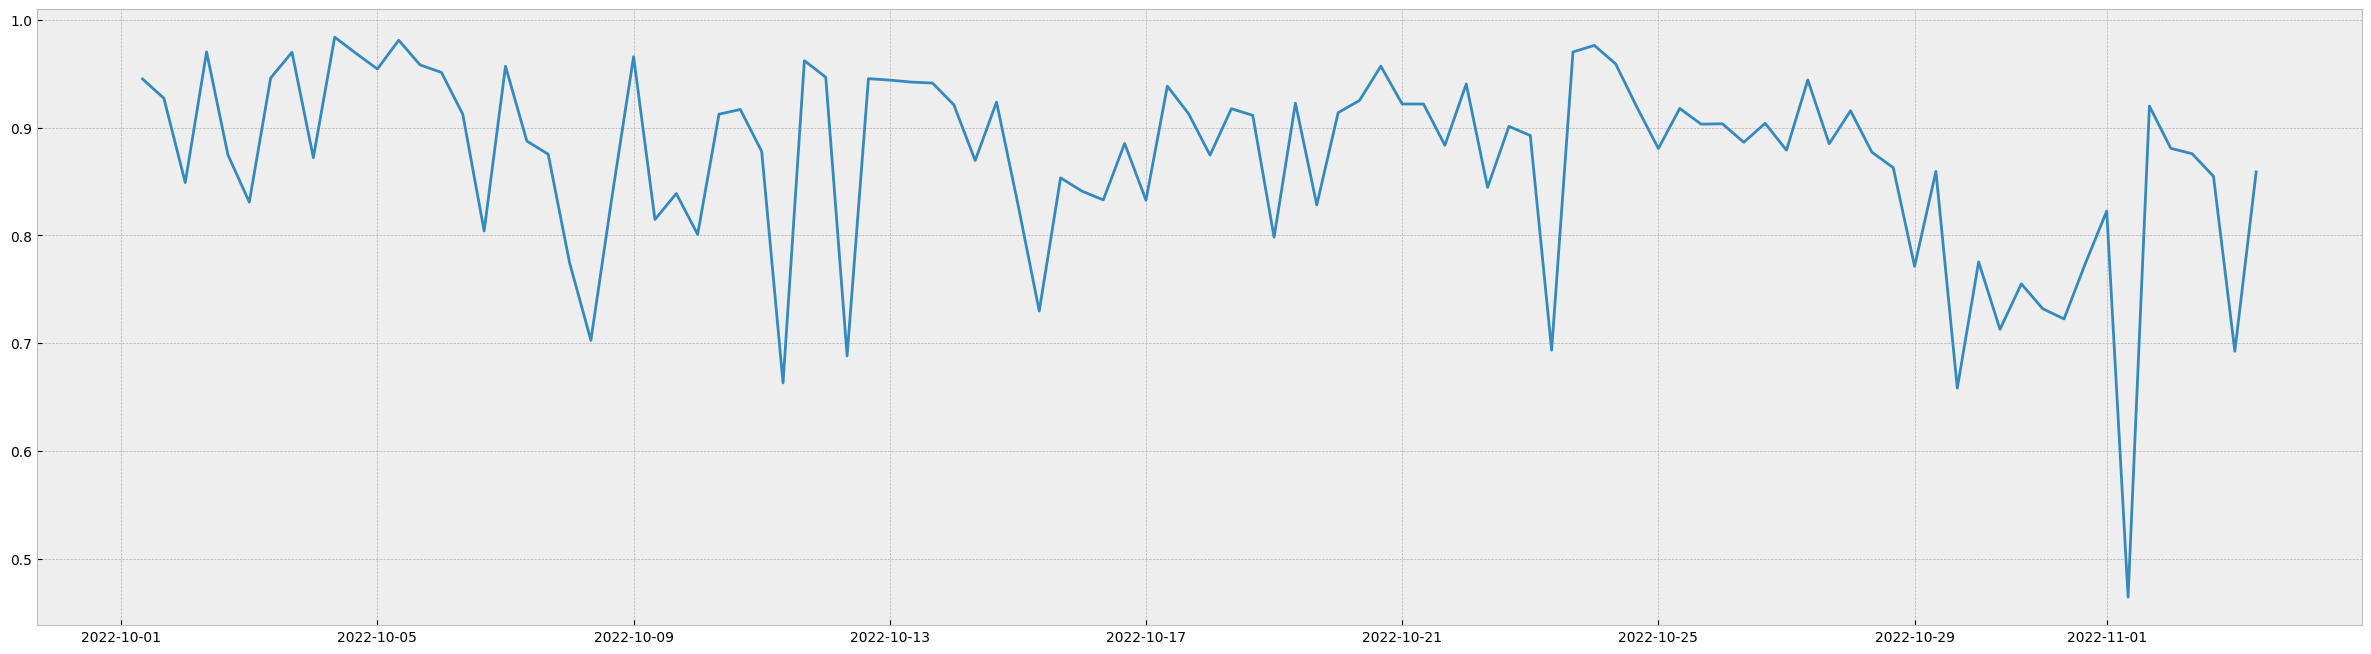

In [61]:
decomposition = sm.tsa.seasonal_decompose(dummy_data.set_index(['Date'])[:100], period=3 ,model='additive') # additive seasonal index
plt.figure(figsize=(30, 8))
plt.plot(dummy_data.set_index(['Date'])[:100])
plt.show()

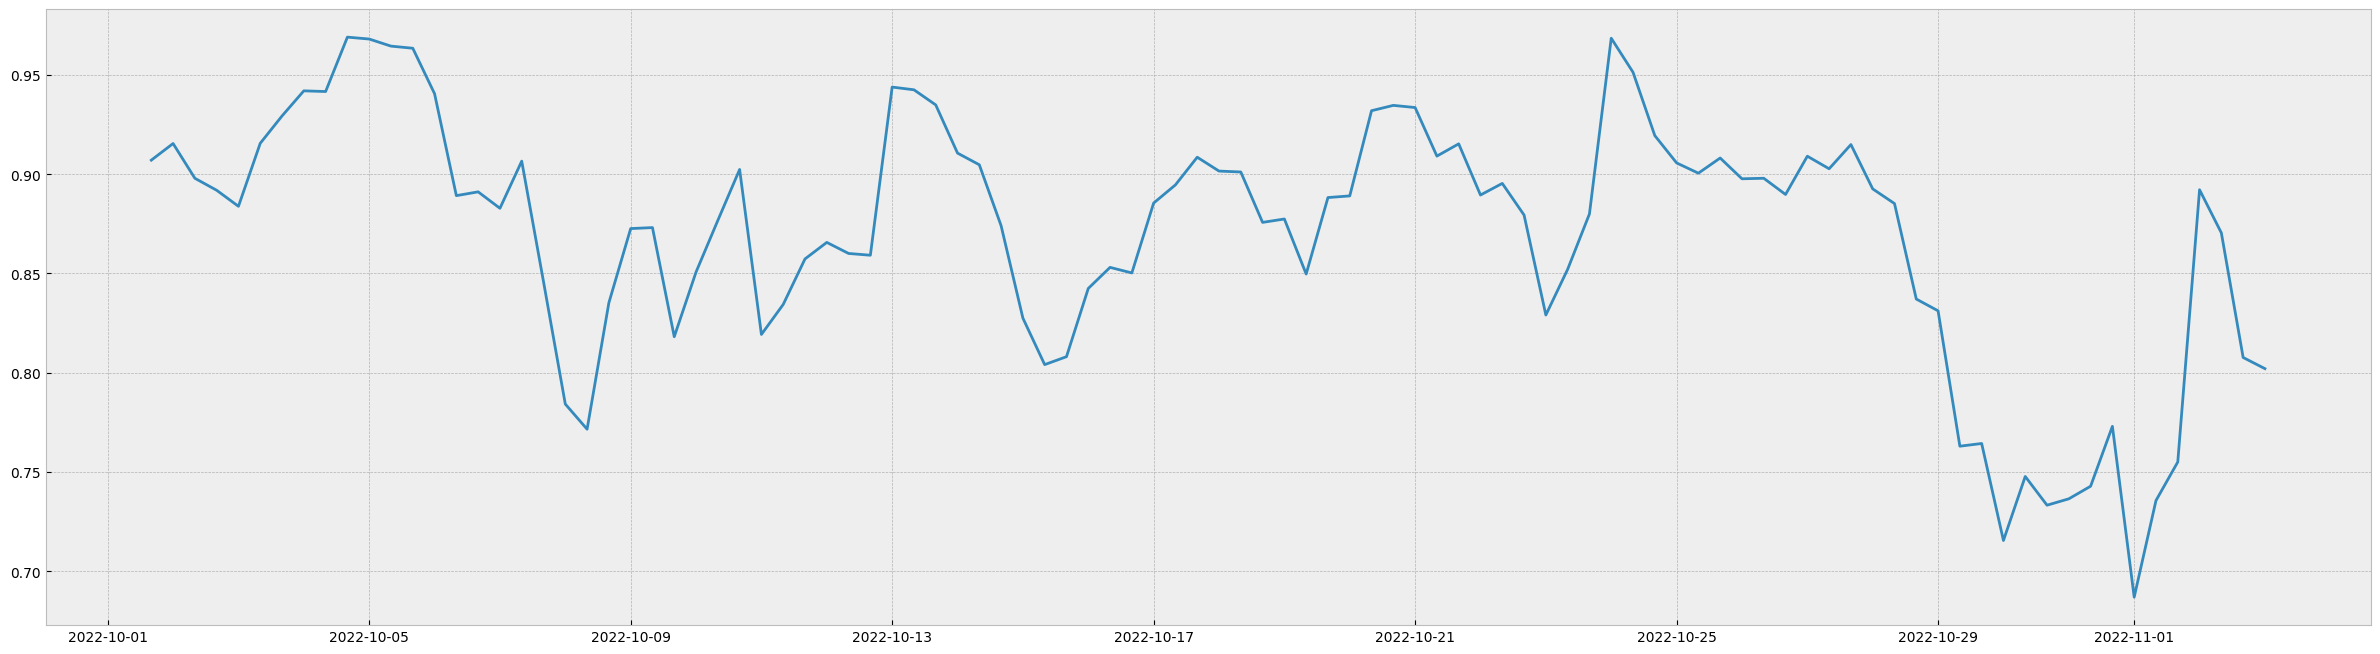

In [62]:
plt.figure(figsize=(30, 8))
fig = decomposition.trend
plt.plot(fig)
plt.show()

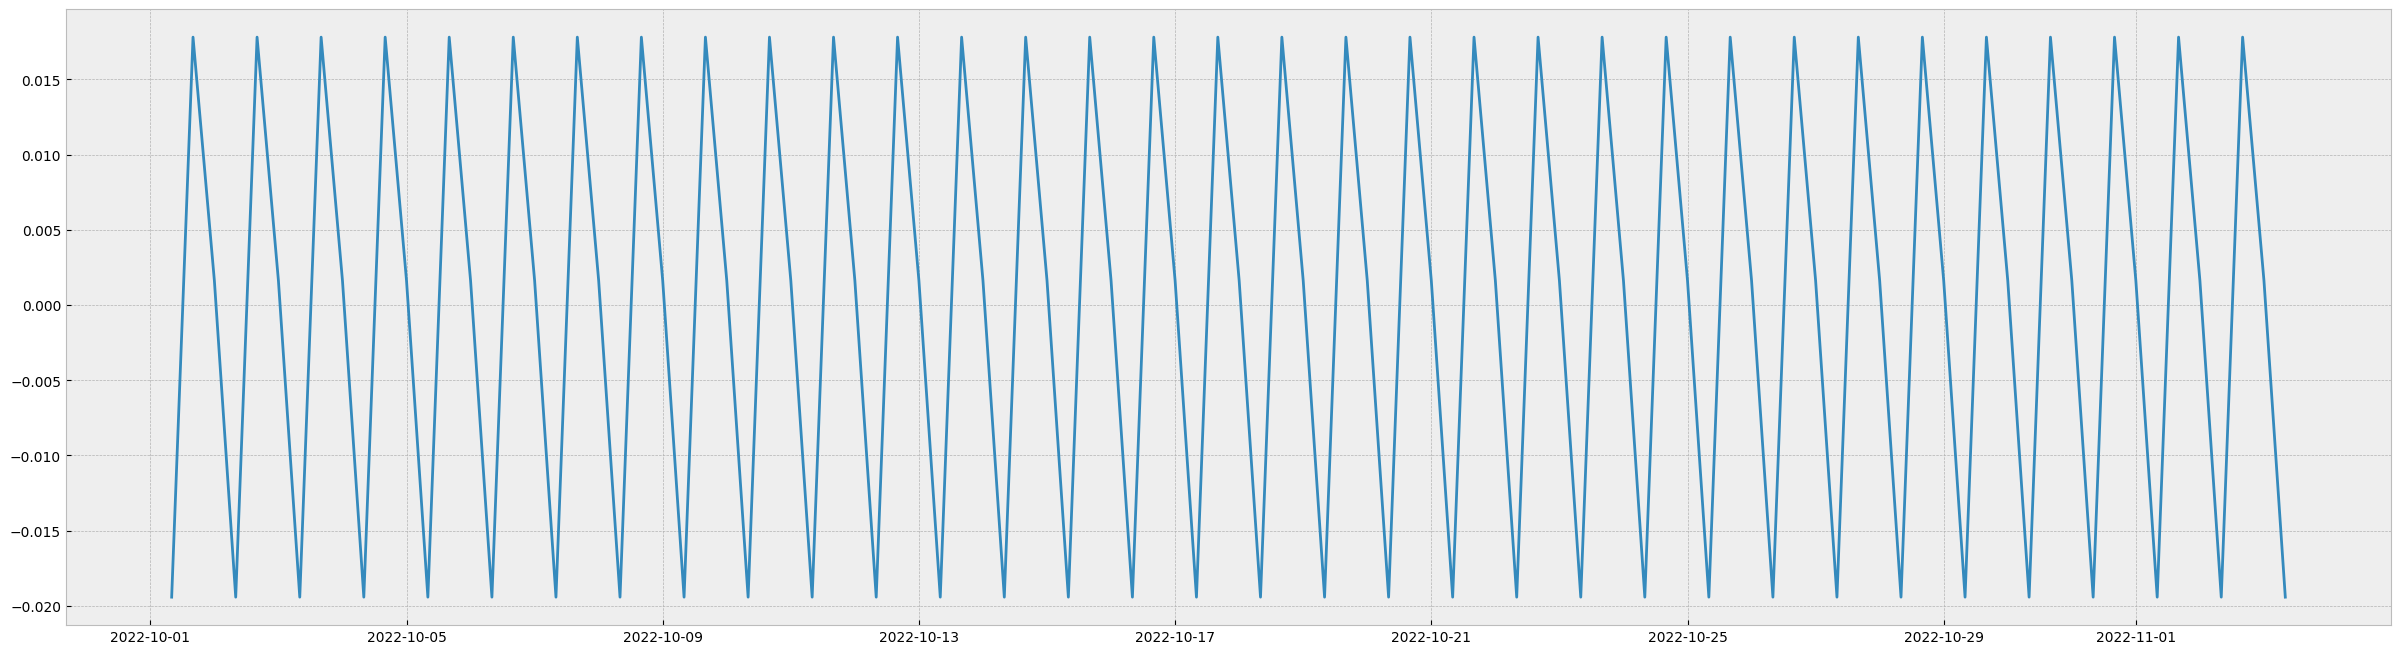

In [63]:
plt.figure(figsize=(30, 8))
fig = decomposition.seasonal
plt.plot(fig)
plt.show()

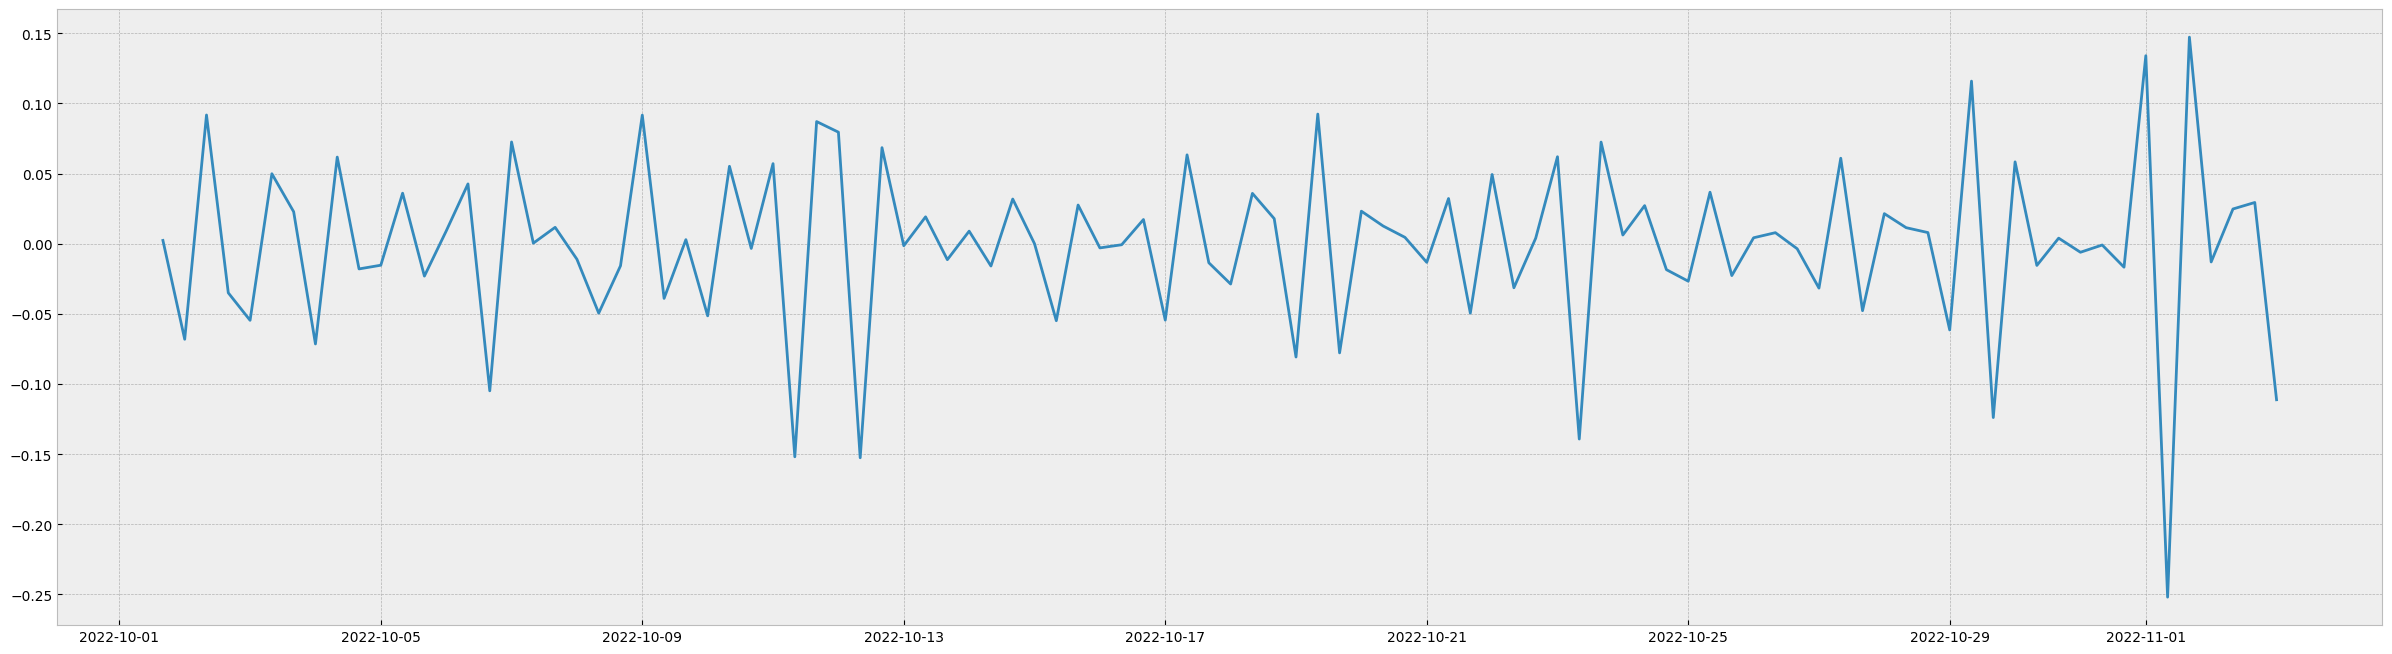

In [64]:
plt.figure(figsize=(30, 8))
fig = decomposition.resid
plt.plot(fig)
plt.show()

In [65]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dummy_data.set_index(['Date']))
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
if adf[1] < 0.05:
    print('The data is stationary')
else:
    print('The data is not stationary')

ADF Statistic: -2.034867978490933
p-value: 0.27149699475090294
The data is not stationary


In [66]:
def sarima(data, p, d, q, P, D, Q, s):
  model = SARIMAX(data, order=(p, d, q), seasonal_order = (P, D, Q, s))
  model = model.fit()
  return model

Autocorrelation = 0.2328


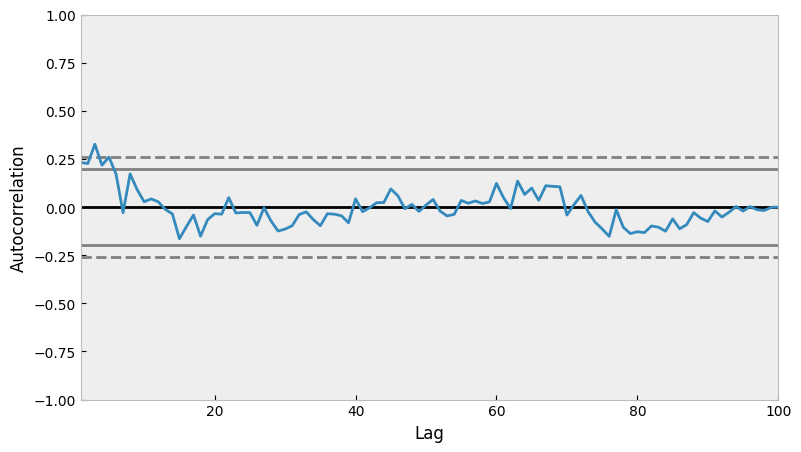

In [67]:
plt.figure(figsize = (9, 5))
pd.plotting.autocorrelation_plot(dummy_data.set_index(['Date'])['Demand'][:100])
print('Autocorrelation =', round(dummy_data.set_index(['Date'])['Demand'][:100].autocorr(), 4))

<Figure size 1500x1600 with 0 Axes>

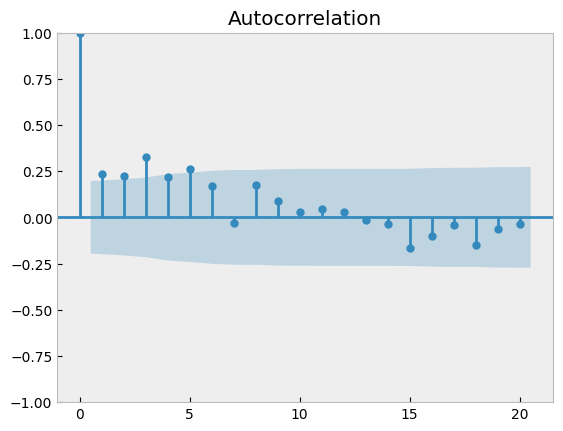

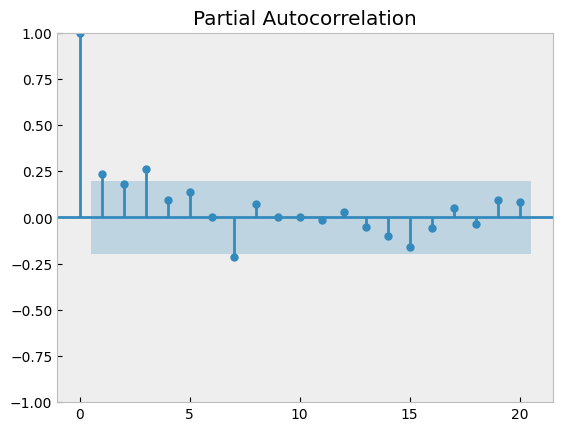

In [68]:
plt.figure(figsize = (15, 16))
plot_acf(dummy_data.set_index(['Date'])['Demand'][:100])
plt.grid()
plot_pacf(dummy_data.set_index(['Date'])['Demand'][:100])
plt.grid()
plt.show()

In [69]:
train_ts = dummy_data.set_index(['Date'])[:900]
test_ts = dummy_data.set_index(['Date'])[899:]

In [70]:
train_ts

,Demand
Date,
2022-10-01 07:59:00,0.945106
2022-10-01 15:59:00,0.927205
2022-10-01 23:59:00,0.848956
2022-10-02 07:59:00,0.970238
2022-10-02 15:59:00,0.874688
...,...
2023-07-26 15:59:00,0.884200
2023-07-26 23:59:00,0.778115
2023-07-27 07:59:00,0.723508


In [71]:
test_ts

,Demand
Date,
2023-07-27 23:59:00,0.877770
2023-07-28 07:59:00,0.928241
2023-07-28 15:59:00,0.827318
2023-07-28 23:59:00,0.842927
2023-07-29 07:59:00,0.866358
...,...
2023-09-20 15:59:00,0.809827
2023-09-20 23:59:00,0.703184
2023-09-21 07:59:00,0.000000


In [72]:
arima_model = auto_arima(train_ts ,
                         start_p = 0,
                         start_q = 0,
                         m = 12,
                         seasonal = True,
                         test = "adf",
                         d = None,
                         trace = True,
                         alpha = 0.05,
                         information_criterion = 'aic',
                         suppress_warnings = True,
                         stepwise = True)
print("AIC = ", round(arima_model.aic(), 2))

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-1715.521, Time=3.80 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-1631.917, Time=0.18 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-1825.984, Time=5.71 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-1788.903, Time=2.53 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2175.592, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-1768.366, Time=0.14 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=14.99 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=6.13 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-1815.585, Time=2.87 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=17.60 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-1737.454, Time=4.81 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=-1734.575, Time=7.01 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-1895.799, Time=6.41 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-1869.977, Time=0.72 sec
 ARIMA(1,0,1)(2,0,0)[1

In [73]:
print(arima_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  900
Model:             SARIMAX(3, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 962.069
Date:                              Sun, 08 Oct 2023   AIC                          -1912.138
Time:                                      04:53:14   BIC                          -1883.324
Sample:                                  10-01-2022   HQIC                         -1901.131
                                       - 07-27-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3109      0.035      8.974      0.000       0.243       0.379
ar.L1          0.21

In [79]:
model = sarima(train_ts , 3, 0, 0, 0 ,0 , 1 , 12 )
predict = model.predict(train_ts.size , dummy_data.set_index(['Date']).size)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 8H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 8H will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01665D+00    |proj g|=  2.37222D-01

At iterate    5    f= -1.01725D+00    |proj g|=  2.01245D-01

At iterate   10    f= -1.01740D+00    |proj g|=  1.17281D-02

At iterate   15    f= -1.01740D+00    |proj g|=  2.29777D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     23      1     0     0   1.715D-03  -1.017D+00
  F =  -1.0173972131425391     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [80]:
len(test_ts)

169

In [81]:
predict

2023-07-28 07:59:00    0.814938
2023-07-28 15:59:00    0.846965
2023-07-28 23:59:00    0.837544
2023-07-29 07:59:00    0.830597
2023-07-29 15:59:00    0.814025
                         ...   
2023-09-20 23:59:00    0.657633
2023-09-21 07:59:00    0.656640
2023-09-21 15:59:00    0.655649
2023-09-21 23:59:00    0.654659
2023-09-22 07:59:00    0.653671
Freq: 8H, Name: predicted_mean, Length: 169, dtype: float64

In [82]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(test_ts['Demand'], predict))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.13638828189183716


In [83]:
predictions = pd.DataFrame(predict)

In [84]:
predictions

,predicted_mean
2023-07-28 07:59:00,0.814938
2023-07-28 15:59:00,0.846965
2023-07-28 23:59:00,0.837544
2023-07-29 07:59:00,0.830597
2023-07-29 15:59:00,0.814025
...,...
2023-09-20 23:59:00,0.657633
2023-09-21 07:59:00,0.656640
2023-09-21 15:59:00,0.655649
2023-09-21 23:59:00,0.654659


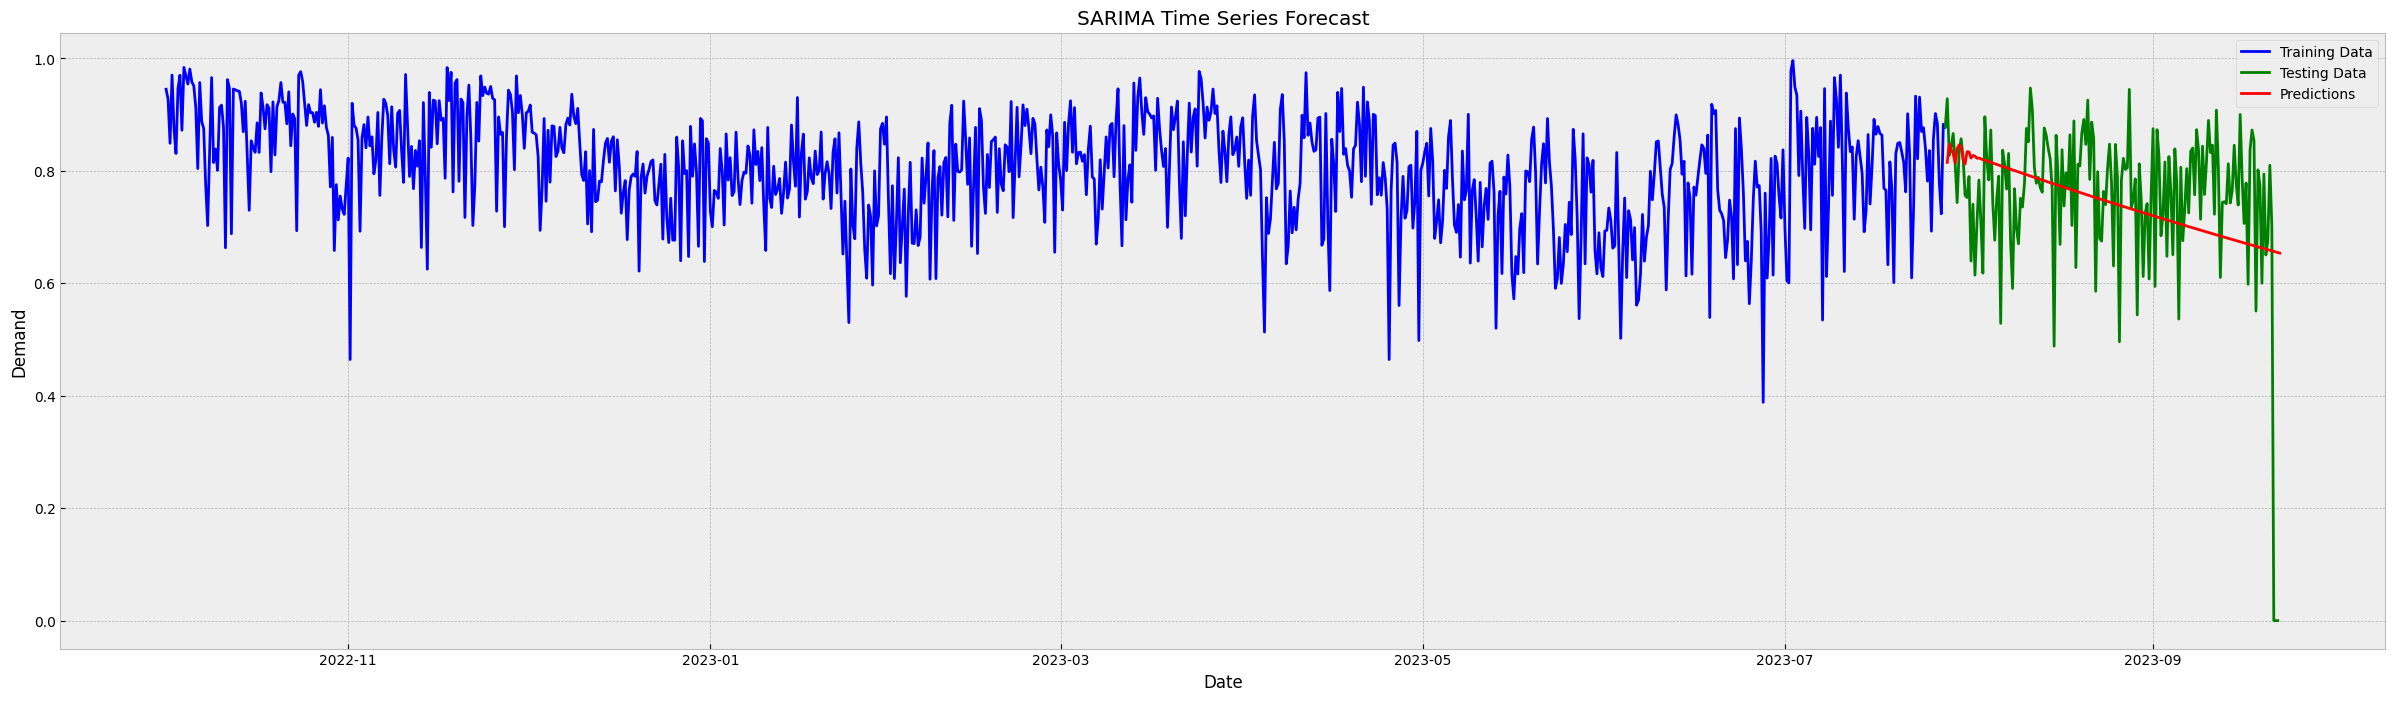

In [85]:
# Plot the training, testing, and prediction data
plt.figure(figsize=(30, 8))
plt.plot(train_ts.index, train_ts['Demand'], label='Training Data', color='blue')
plt.plot(test_ts.index, test_ts['Demand'], label='Testing Data', color='green')
plt.plot(predictions.index , predictions['predicted_mean'] ,label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.title('SARIMA Time Series Forecast')
plt.grid(True)
plt.show()

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [89]:
dummy_data['Date'] = pd.to_datetime(dummy_data['Date'], format='%d/%m/%Y %H:%M')

sequence_length = 7
prediction_horizon = 1


def create_sequences(data, sequence_length, prediction_horizon):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length - prediction_horizon + 1):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length:i + sequence_length + prediction_horizon]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [90]:
# Create sequences for training
X_train, y_train = create_sequences(train_ts['Demand'].values, sequence_length, prediction_horizon)
X_test, y_test = create_sequences(test_ts['Demand'].values, sequence_length, prediction_horizon)

In [91]:
# Build a Conv-BiLSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(prediction_horizon))  # Output layer

In [92]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 64)            0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 2, 100)           46000     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 2, 100)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                        

In [94]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
14/14 [==============================] - 6s 11ms/step - loss: 0.5312
Epoch 2/50
14/14 [==============================] - 0s 10ms/step - loss: 0.1648
Epoch 3/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0368
Epoch 4/50
14/14 [==============================] - 0s 11ms/step - loss: 0.0216
Epoch 5/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 6/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0152
Epoch 7/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0141
Epoch 8/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 9/50
14/14 [==============================] - 0s 11ms/step - loss: 0.0153
Epoch 10/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0142
Epoch 11/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0142
Epoch 12/50
14/14 [==============================] - 0s 11ms/step - loss: 0.0146
Epoch 13/50
14/14 [==================

In [95]:
# Make predictions
predictions = model.predict(X_test)

6/6 [==============================] - 1s 3ms/step


In [96]:
len(predictions)

162

In [97]:
# Generate integer indices for the predictions
forecast_indices = np.arange(len(train_ts) + sequence_length, len(train_ts) + sequence_length + len(predictions))

# Create a DataFrame for the predictions with integer indices
prediction_df = pd.DataFrame({'Index': forecast_indices, 'Prediction': predictions.flatten()})

prediction_df.set_index(['Index'] , inplace = True)

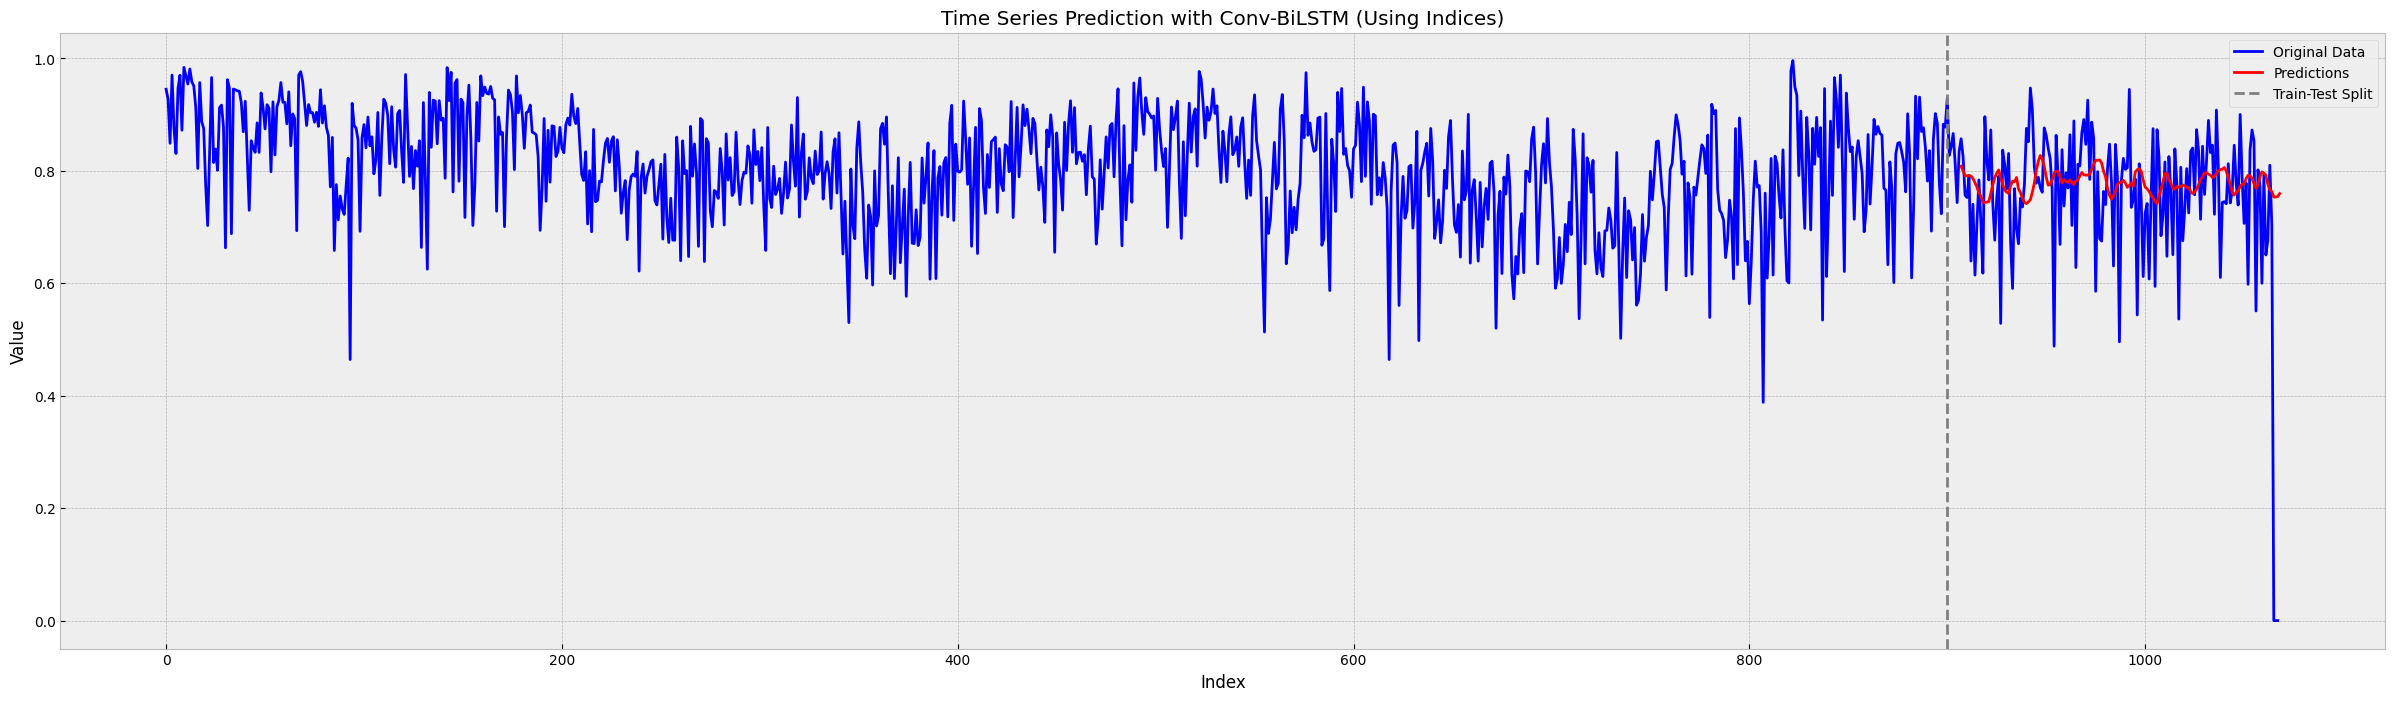

In [98]:
# Plot the predictions along with the original data
original_data = dummy_data.set_index(['Date'])['Demand'].values
plt.figure(figsize=(30, 8))
plt.plot(np.arange(len(dummy_data)), original_data, label='Original Data', color='blue')
plt.plot(prediction_df.index, prediction_df['Prediction'], label='Predictions', color='red')
plt.axvline(len(train_ts), color='gray', linestyle='--', linewidth=2, label='Train-Test Split')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('Time Series Prediction with Conv-BiLSTM (Using Indices)')
plt.grid(True)
plt.show()

In [99]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.13960831249371966


# Booking Data 1

In [142]:
from hierarchicalforecast.utils import aggregate

In [143]:
heiracrchy = [['Flight number'] , ['Flight number', 'Cabin'],
        ['Flight number', 'Cabin', 'Booking Class']]

In [113]:
flight_data_ = b_dat[b_dat['Unique_id'] == 'YYYAAA'][['Cabin', 'Flight number' ,
 'Booking Class',
 ' Booking Class Fare USD ' , 'Dep_Date' , 'Dep_time' , 'Class RDay Res Hold Total RDay: 0']]

In [114]:
flight_data_

,Cabin,Flight number,Booking Class,Booking Class Fare USD,Dep_Date,Dep_time,Class RDay Res Hold Total RDay: 0
168276,Y,404,Q,127.00,1/10/2022,07:15,0
168277,J,404,D,249.00,1/10/2022,07:15,3
168278,Y,404,E,176.00,1/10/2022,07:15,0
168279,Y,404,K,245.00,1/10/2022,07:15,34
168280,Y,404,X,12.00,1/10/2022,07:15,2
...,...,...,...,...,...,...,...
205775,Y,444,V,194.46,30/10/2022,20:15,2
205776,Y,444,H,367.19,30/10/2022,20:15,4
205777,Y,444,B,485.37,30/10/2022,20:15,2
205778,Y,444,T,158.10,30/10/2022,20:15,0


In [118]:
flight_data_.reset_index(inplace = True)

In [119]:
dates = []
for i , j  in  enumerate(flight_data_['Dep_Date']):
  date_string  = j
  if (len(date_string) <= 10):
    date = datetime.strptime(date_string , "%d/%m/%Y")
  else :
    date = datetime.strptime(date_string , "%d/%m/%Y %H:%M")

  date = datetime.strftime(date , "%d/%m/%Y")
  date_string  = date + " " + flight_data_['Dep_time'][i]
  date = datetime.strptime(date_string , "%d/%m/%Y %H:%M")
  date = datetime.strftime(date , "%Y-%m-%d %H:%M:%S")
  date = datetime.strptime(date , "%Y-%m-%d %H:%M:%S")
  dates.append(date)

In [120]:
flight_data_['Time_stamp'] = dates

In [122]:
flight_data_.drop(['index'] , axis = 1 , inplace = True)

In [125]:
flight_data_

,Cabin,Flight number,Booking Class,Booking Class Fare USD,Dep_Date,Dep_time,Class RDay Res Hold Total RDay: 0,Time_stamp
0,Y,404,Q,127.00,1/10/2022,07:15,0,2022-10-01 07:15:00
1,J,404,D,249.00,1/10/2022,07:15,3,2022-10-01 07:15:00
2,Y,404,E,176.00,1/10/2022,07:15,0,2022-10-01 07:15:00
3,Y,404,K,245.00,1/10/2022,07:15,34,2022-10-01 07:15:00
4,Y,404,X,12.00,1/10/2022,07:15,2,2022-10-01 07:15:00
...,...,...,...,...,...,...,...,...
37499,Y,444,V,194.46,30/10/2022,20:15,2,2022-10-30 20:15:00
37500,Y,444,H,367.19,30/10/2022,20:15,4,2022-10-30 20:15:00
37501,Y,444,B,485.37,30/10/2022,20:15,2,2022-10-30 20:15:00
37502,Y,444,T,158.10,30/10/2022,20:15,0,2022-10-30 20:15:00


In [127]:
flight_data_.columns

Index(['Cabin', 'Flight number', 'Booking Class', ' Booking Class Fare USD ',
       'Dep_Date', 'Dep_time', 'Class RDay Res Hold Total RDay: 0',
       'Time_stamp'],
      dtype='object')

In [130]:
X_ts = flight_data_[['Time_stamp' ,'Cabin', 'Flight number', 'Booking Class', ' Booking Class Fare USD ', 'Class RDay Res Hold Total RDay: 0']]

In [136]:
X_ts

,Time_stamp,Cabin,Flight number,Booking Class,Booking Class Fare USD,Class RDay Res Hold Total RDay: 0
0,2022-10-01 07:15:00,Y,404,Q,127.00,0
1,2022-10-01 07:15:00,J,404,D,249.00,3
2,2022-10-01 07:15:00,Y,404,E,176.00,0
3,2022-10-01 07:15:00,Y,404,K,245.00,34
4,2022-10-01 07:15:00,Y,404,X,12.00,2
...,...,...,...,...,...,...
37499,2022-10-30 20:15:00,Y,444,V,194.46,2
37500,2022-10-30 20:15:00,Y,444,H,367.19,4
37501,2022-10-30 20:15:00,Y,444,B,485.37,2
37502,2022-10-30 20:15:00,Y,444,T,158.10,0


In [138]:
X_ts = X_ts.sort_values(by='Time_stamp', ascending=True)

In [140]:
X_ts = X_ts.reset_index().drop(['index'] , axis = 1)

In [141]:
X_ts

,Time_stamp,Cabin,Flight number,Booking Class,Booking Class Fare USD,Class RDay Res Hold Total RDay: 0
0,2022-10-01 07:15:00,Y,404,Q,127.00,0
1,2022-10-01 07:15:00,Y,404,P,133.00,2
2,2022-10-01 07:15:00,Y,404,O,167.00,5
3,2022-10-01 07:15:00,Y,404,A,37.00,0
4,2022-10-01 07:15:00,Y,404,F,73.00,0
...,...,...,...,...,...,...
37499,2023-09-21 19:50:00,Y,442,E,233.21,1
37500,2023-09-21 19:50:00,J,442,D,424.12,0
37501,2023-09-21 19:50:00,Y,442,K,333.21,0
37502,2023-09-21 19:50:00,Y,442,H,378.66,0


In [144]:
X_ts = X_ts.rename(columns={'Class RDay Res Hold Total RDay: 0': 'y'})

In [148]:
X_ts = X_ts.rename(columns={'Time_stamp': 'ds'})

In [158]:
X_ts_ = X_ts.drop([' Booking Class Fare USD '] , axis =1)

In [159]:
columns_to_convert = ['Cabin', 'Flight number', 'Booking Class']
X_ts_[columns_to_convert] = X_ts_[columns_to_convert].astype(str)

In [162]:
train = X_ts_.loc[X_ts_['ds'] < '2023-08-01']
valid = X_ts_.loc[(X_ts_['ds'] >= '2023-08-01')]
h = valid['ds'].nunique()

In [163]:
from hierarchicalforecast.utils import aggregate

train_agg, S_train, tags = aggregate(X_ts_, heiracrchy)
valid_agg, _, _ = aggregate(valid, heiracrchy)

In [172]:
train_agg

,ds,y
unique_id,,
404,2022-10-01 07:15:00,141
404,2022-10-03 07:15:00,147
404,2022-10-04 07:15:00,184
404,2022-10-05 07:15:00,155
404,2022-10-06 07:15:00,138
...,...,...
444/Y/Y,2022-10-25 20:15:00,1
444/Y/Y,2022-10-26 20:15:00,6
444/Y/Y,2022-10-27 20:15:00,7


In [176]:
df =train_agg.reset_index()

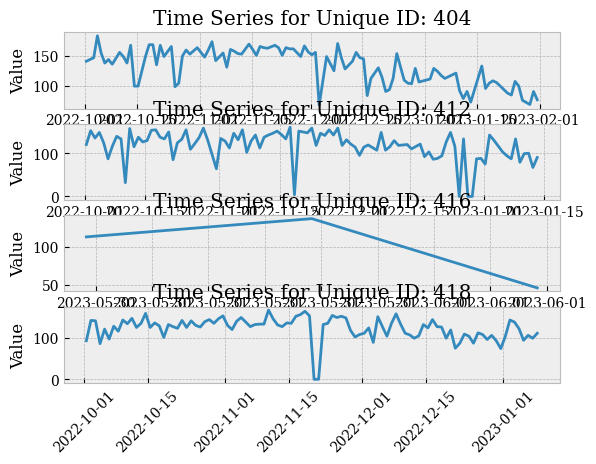

In [210]:
# Convert the 'ds' column to a datetime object
df['ds'] = pd.to_datetime(df['ds'])

# Get unique IDs from the 'unique_id' column
unique_ids = df['unique_id'].unique()

# Create subplots to plot all time series
fig, axes = plt.subplots(4 ,1  )

# Iterate through each unique ID and plot the corresponding time series
for i, unique_id in enumerate(unique_ids):
    # Filter the DataFrame for the current unique_id
    subset_df = df[df['unique_id'] == unique_id][:100]
    
    # Extract the 'ds' and 'y' columns for plotting
    ds = subset_df['ds']
    y = subset_df['y']
    
     # Plot the time series on the corresponding subplot
    ax = axes[i]
    ax.plot(ds, y)
    ax.set_title(f'Time Series for Unique ID: {unique_id}')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.15)  # Adjust the bottom margin for rotated labels
   
    if i>=3 :
      break
    


# Show the plots
plt.show()

In [166]:
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.4 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.7-py3-none-any.whl size=158208 sha256=b312bd923ff38fafb3b5c48207226d08ddee4229e6f2516b1b21f45d379ff3b6
  Stored in directory: /root/.cache/pip/wheels/2c/6a/bb/a1d60fffdfaeabda73de1364df4f6ad6586a052b07ec03e5af
Successfully built fugue-sql-antlr


In [173]:
from statsforecast import StatsForecast
from statsforecast.models import HoltWinters
model = StatsForecast(models=[HoltWinters(season_length=7, error_type='A')],freq = '3D' ,  n_jobs=-1)
model.fit(train_agg)

KeyError: 'fitted'

# Booking_Data_use 2

In [211]:
from sklearn.preprocessing import LabelEncoder

In [212]:
b_dat

,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,Class RDay Res Hold Total RDay: 365,...,Class RDay Res Hold Total RDay: 8,Class RDay Res Hold Total RDay: 7,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0,Unique_id
0,BBB,DDD,Y,N,200.01,AA,304,4/10/2022,05:55,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10,BBBDDD
1,BBB,DDD,Y,H,463.65,AA,304,4/10/2022,05:55,NaN,...,0.0,0.0,1.0,6.0,7.0,7.0,7.0,7.0,7,BBBDDD
2,BBB,DDD,Y,G,149.83,AA,304,4/10/2022,05:55,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,BBBDDD
3,BBB,DDD,Y,T,127.29,AA,304,4/10/2022,05:55,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,BBBDDD
4,BBB,DDD,Y,S,90.92,AA,304,4/10/2022,05:55,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10,BBBDDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212796,YYY,CCC,Y,W,968.69,AA,65,21/09/2023,17:45,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8,YYYCCC
212797,YYY,CCC,J,D,1348.90,AA,65,21/09/2023,17:45,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,YYYCCC
212798,YYY,CCC,Y,Q,316.91,AA,65,21/09/2023,17:45,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,YYYCCC
212799,YYY,CCC,Y,K,693.79,AA,65,21/09/2023,17:45,NaN,...,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7,YYYCCC


In [213]:
b_dat.columns

Index([' Origin', ' Destination', 'Cabin', 'Booking Class',
       ' Booking Class Fare USD ', 'Airline', 'Flight number', 'Dep_Date',
       'Dep_time', 'Class RDay Res Hold Total RDay: 365',
       ...
       'Class RDay Res Hold Total RDay: 8',
       'Class RDay Res Hold Total RDay: 7',
       'Class RDay Res Hold Total RDay: 6',
       'Class RDay Res Hold Total RDay: 5',
       'Class RDay Res Hold Total RDay: 4',
       'Class RDay Res Hold Total RDay: 3',
       'Class RDay Res Hold Total RDay: 2',
       'Class RDay Res Hold Total RDay: 1',
       'Class RDay Res Hold Total RDay: 0', 'Unique_id'],
      dtype='object', length=376)

In [214]:
b_dat['Unique_id'] = b_dat[' Origin'] + b_dat[' Destination']

In [215]:
b_dat

,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,Class RDay Res Hold Total RDay: 365,...,Class RDay Res Hold Total RDay: 8,Class RDay Res Hold Total RDay: 7,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0,Unique_id
0,BBB,DDD,Y,N,200.01,AA,304,4/10/2022,05:55,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10,BBBDDD
1,BBB,DDD,Y,H,463.65,AA,304,4/10/2022,05:55,NaN,...,0.0,0.0,1.0,6.0,7.0,7.0,7.0,7.0,7,BBBDDD
2,BBB,DDD,Y,G,149.83,AA,304,4/10/2022,05:55,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,BBBDDD
3,BBB,DDD,Y,T,127.29,AA,304,4/10/2022,05:55,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,BBBDDD
4,BBB,DDD,Y,S,90.92,AA,304,4/10/2022,05:55,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10,BBBDDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212796,YYY,CCC,Y,W,968.69,AA,65,21/09/2023,17:45,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8,YYYCCC
212797,YYY,CCC,J,D,1348.90,AA,65,21/09/2023,17:45,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,YYYCCC
212798,YYY,CCC,Y,Q,316.91,AA,65,21/09/2023,17:45,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,YYYCCC
212799,YYY,CCC,Y,K,693.79,AA,65,21/09/2023,17:45,NaN,...,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7,YYYCCC


In [216]:
b_dat['Unique_id'].describe()

count     212801
unique         6
top       BBBDDD
freq       92925
Name: Unique_id, dtype: object

In [217]:
b_dat['Unique_id'].unique()

array(['BBBDDD', 'AAABBB', 'CCCDDD', 'ZZZYYY', 'YYYAAA', 'YYYCCC'],
      dtype=object)

In [218]:
b_dat['Airline'].unique()

array(['AA'], dtype=object)

In [219]:
X = b_dat[['Unique_id', 'Cabin', 'Booking Class',
       ' Booking Class Fare USD ', 'Flight number', 'Dep_Date',
       'Dep_time']]

In [220]:
X

,Unique_id,Cabin,Booking Class,Booking Class Fare USD,Flight number,Dep_Date,Dep_time
0,BBBDDD,Y,N,200.01,304,4/10/2022,05:55
1,BBBDDD,Y,H,463.65,304,4/10/2022,05:55
2,BBBDDD,Y,G,149.83,304,4/10/2022,05:55
3,BBBDDD,Y,T,127.29,304,4/10/2022,05:55
4,BBBDDD,Y,S,90.92,304,4/10/2022,05:55
...,...,...,...,...,...,...,...
212796,YYYCCC,Y,W,968.69,65,21/09/2023,17:45
212797,YYYCCC,J,D,1348.90,65,21/09/2023,17:45
212798,YYYCCC,Y,Q,316.91,65,21/09/2023,17:45
212799,YYYCCC,Y,K,693.79,65,21/09/2023,17:45


In [221]:
X_AB = X[X['Unique_id'] == 'AAABBB']

In [222]:
X_AB.reset_index(inplace = True)

In [223]:
X_AB.drop(['index'] , axis = 1 , inplace = True )

/tmp/ipykernel_32/3202801135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_AB.drop(['index'] , axis = 1 , inplace = True )


In [224]:
X_AB.drop(['Unique_id' , 'Flight number'] , axis =1 , inplace = True)

/tmp/ipykernel_32/3706202484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_AB.drop(['Unique_id' , 'Flight number'] , axis =1 , inplace = True)


In [225]:
X_AB

,Cabin,Booking Class,Booking Class Fare USD,Dep_Date,Dep_time
0,Y,V,243.92,1/10/2022,06:10
1,J,C,662.10,1/10/2022,06:10
2,J,J,1071.19,1/10/2022,06:10
3,J,D,505.30,1/10/2022,06:10
4,Y,Q,207.55,1/10/2022,06:10
...,...,...,...,...,...
29576,Y,Q,219.37,20/08/2023,21:00
29577,Y,P,237.55,20/08/2023,21:00
29578,Y,O,293.01,20/08/2023,21:00
29579,Y,I,189.37,20/08/2023,21:00


In [226]:
le = LabelEncoder()

In [227]:
le.fit(X_AB['Cabin'].tolist())

LabelEncoder()

In [228]:
X_AB['Cabin'] = le.transform(X_AB['Cabin'].tolist())

/tmp/ipykernel_32/4180379518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_AB['Cabin'] = le.transform(X_AB['Cabin'].tolist())


In [229]:
le.fit(X_AB['Booking Class'].tolist())
X_AB['Booking Class'] = le.transform(X_AB['Booking Class'].tolist())

/tmp/ipykernel_32/1326787476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_AB['Booking Class'] = le.transform(X_AB['Booking Class'].tolist())


In [230]:
X_AB

,Cabin,Booking Class,Booking Class Fare USD,Dep_Date,Dep_time
0,1,21,243.92,1/10/2022,06:10
1,0,2,662.10,1/10/2022,06:10
2,0,9,1071.19,1/10/2022,06:10
3,0,3,505.30,1/10/2022,06:10
4,1,16,207.55,1/10/2022,06:10
...,...,...,...,...,...
29576,1,16,219.37,20/08/2023,21:00
29577,1,15,237.55,20/08/2023,21:00
29578,1,14,293.01,20/08/2023,21:00
29579,1,8,189.37,20/08/2023,21:00


In [231]:
dattes = []
for i , j in enumerate(X_AB['Dep_Date']):
  dates = X_AB['Dep_Date'][i] + " " + X_AB['Dep_time'][i]
  date = datetime.strptime(dates , "%d/%m/%Y %H:%M")
  date = datetime.strftime(date , "%Y-%m-%d %H:%M:%S")
  date = datetime.strptime(date , "%Y-%m-%d %H:%M:%S")
  dattes.append(date)


In [232]:
X_AB['Dates'] = dattes

/tmp/ipykernel_32/392413888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_AB['Dates'] = dattes


In [233]:
X_AB

,Cabin,Booking Class,Booking Class Fare USD,Dep_Date,Dep_time,Dates
0,1,21,243.92,1/10/2022,06:10,2022-10-01 06:10:00
1,0,2,662.10,1/10/2022,06:10,2022-10-01 06:10:00
2,0,9,1071.19,1/10/2022,06:10,2022-10-01 06:10:00
3,0,3,505.30,1/10/2022,06:10,2022-10-01 06:10:00
4,1,16,207.55,1/10/2022,06:10,2022-10-01 06:10:00
...,...,...,...,...,...,...
29576,1,16,219.37,20/08/2023,21:00,2023-08-20 21:00:00
29577,1,15,237.55,20/08/2023,21:00,2023-08-20 21:00:00
29578,1,14,293.01,20/08/2023,21:00,2023-08-20 21:00:00
29579,1,8,189.37,20/08/2023,21:00,2023-08-20 21:00:00


In [234]:
demands = []
for i , j in enumerate(X_AB['Dates']):
  demand = 0
  for x , y in enumerate(dummy_data['Date']):
    #print(y , j , y-j)
    if (j-y) <= timedelta(hours = 7 , minutes = 59) :
      demand = dummy_data['Demand'][x]
      break

  if i%100 == 0:
    print(i)
  if demand == 0:
    demands.append(0.5)
  else :
    demands.append(demand)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [235]:
X_AB['Demand'] = demands

/tmp/ipykernel_32/4037761194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_AB['Demand'] = demands


In [236]:
X_AB

,Cabin,Booking Class,Booking Class Fare USD,Dep_Date,Dep_time,Dates,Demand
0,1,21,243.92,1/10/2022,06:10,2022-10-01 06:10:00,0.945106
1,0,2,662.10,1/10/2022,06:10,2022-10-01 06:10:00,0.945106
2,0,9,1071.19,1/10/2022,06:10,2022-10-01 06:10:00,0.945106
3,0,3,505.30,1/10/2022,06:10,2022-10-01 06:10:00,0.945106
4,1,16,207.55,1/10/2022,06:10,2022-10-01 06:10:00,0.945106
...,...,...,...,...,...,...,...
29576,1,16,219.37,20/08/2023,21:00,2023-08-20 21:00:00,0.846958
29577,1,15,237.55,20/08/2023,21:00,2023-08-20 21:00:00,0.846958
29578,1,14,293.01,20/08/2023,21:00,2023-08-20 21:00:00,0.846958
29579,1,8,189.37,20/08/2023,21:00,2023-08-20 21:00:00,0.846958


In [237]:
X_ = X_AB[['Cabin' , 'Booking Class' , 'Demand']]
y_ = X_AB[[' Booking Class Fare USD ']]

In [238]:
X_correlation = X_AB[['Cabin' , 'Booking Class' , 'Demand' ,' Booking Class Fare USD ']]

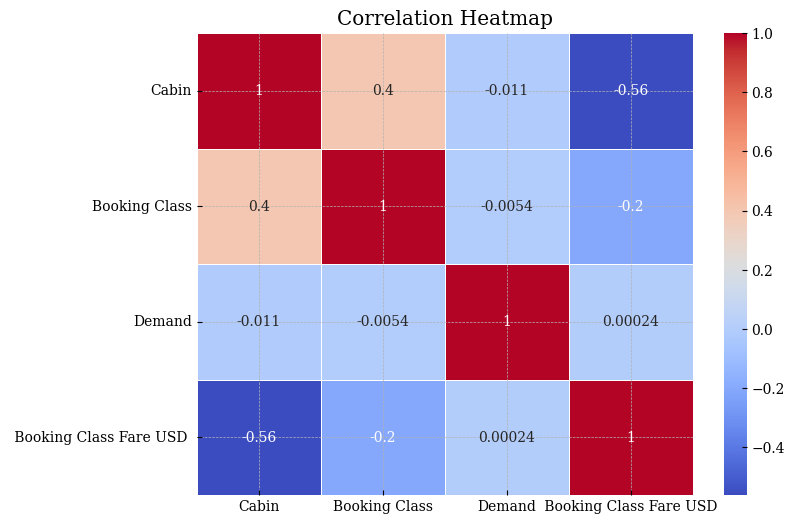

In [239]:
# Calculate the correlation matrix
correlation_matrix = X_correlation.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [240]:
# Split the data into training and testing sets (e.g., 80% for training)
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [241]:
# Create and train the XGBoost regressor
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [242]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [243]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 10.176189816394436


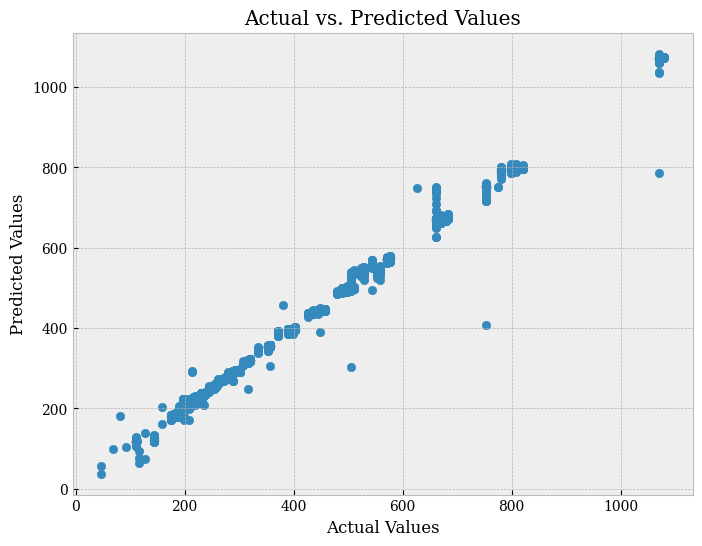

In [244]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

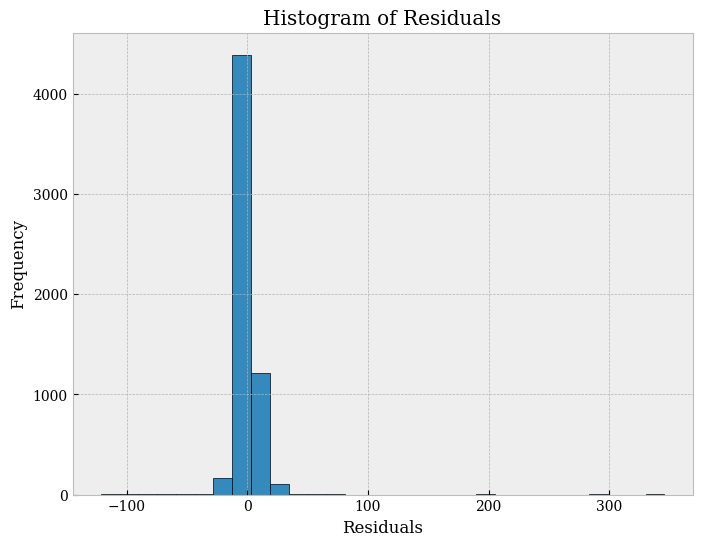

In [245]:
# Calculate residuals (the difference between actual and predicted values)
residuals = y_test[' Booking Class Fare USD '] - y_pred

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

In [246]:
X_correlation.to_csv('Data.csv', index=False)

In [247]:
b_dat

,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,Class RDay Res Hold Total RDay: 365,...,Class RDay Res Hold Total RDay: 8,Class RDay Res Hold Total RDay: 7,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0,Unique_id
0,BBB,DDD,Y,N,200.01,AA,304,4/10/2022,05:55,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10,BBBDDD
1,BBB,DDD,Y,H,463.65,AA,304,4/10/2022,05:55,NaN,...,0.0,0.0,1.0,6.0,7.0,7.0,7.0,7.0,7,BBBDDD
2,BBB,DDD,Y,G,149.83,AA,304,4/10/2022,05:55,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,BBBDDD
3,BBB,DDD,Y,T,127.29,AA,304,4/10/2022,05:55,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,BBBDDD
4,BBB,DDD,Y,S,90.92,AA,304,4/10/2022,05:55,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10,BBBDDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212796,YYY,CCC,Y,W,968.69,AA,65,21/09/2023,17:45,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8,YYYCCC
212797,YYY,CCC,J,D,1348.90,AA,65,21/09/2023,17:45,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,YYYCCC
212798,YYY,CCC,Y,Q,316.91,AA,65,21/09/2023,17:45,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,YYYCCC
212799,YYY,CCC,Y,K,693.79,AA,65,21/09/2023,17:45,NaN,...,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7,YYYCCC


In [248]:
flight_data

,Origin,Destination,Cabin,Booking Class,Booking Class Fare USD,Airline,Flight number,Dep_Date,Dep_time,Class RDay Res Hold Total RDay: 365,...,Class RDay Res Hold Total RDay: 8,Class RDay Res Hold Total RDay: 7,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0,Unique_id
4624,BBB,DDD,J,C,563.65,AA,308,1/10/2022,06:55,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,BBBDDD
4625,BBB,DDD,J,J,836.38,AA,308,1/10/2022,06:55,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,BBBDDD
4626,BBB,DDD,J,D,386.69,AA,308,1/10/2022,06:55,NaN,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4,BBBDDD
4627,BBB,DDD,Y,Q,145.47,AA,308,1/10/2022,06:55,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BBBDDD
4628,BBB,DDD,Y,K,372.74,AA,308,1/10/2022,06:55,NaN,...,42.0,42.0,42.0,42.0,42.0,44.0,44.0,44.0,44,BBBDDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504,BBB,DDD,Y,K,399.32,AA,308,21/09/2023,06:55,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BBBDDD
11505,BBB,DDD,Y,P,172.05,AA,308,21/09/2023,06:55,NaN,...,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,BBBDDD
11506,BBB,DDD,Y,W,562.95,AA,308,21/09/2023,06:55,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BBBDDD
11507,BBB,DDD,Y,I,111.89,AA,308,21/09/2023,06:55,NaN,...,28.0,28.0,28.0,28.0,28.0,28.0,28.0,26.0,25,BBBDDD
